# Doctor's Consultation Fees Prediction
Problem Statement:
Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

In [1]:
## Importing Important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.model_selection import*
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_excel('C:/Users/ASUS/Desktop/PROJECT/csv files/Data-Science-ML-Capstone-Projects-master/Data-Science-ML-Capstone-Projects-master/Final Participant Data Folder/Final_Train.Xlsx')
train.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [3]:
test=pd.read_excel('C:/Users/ASUS/Desktop/PROJECT/csv files/Data-Science-ML-Capstone-Projects-master/Data-Science-ML-Capstone-Projects-master/Final Participant Data Folder/Final_Test.Xlsx')
test.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
5,"BDS, MDS",14 years experience,90%,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23 years experience,94%,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore"
7,"BDS, MDS - Pedodontics",9 years experience,94%,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",11 years experience,99%,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore"
9,BHMS,44 years experience,NaN,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN


# Exploratory Data Analysis

In [4]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [5]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [6]:
# converting Experience column into Numeric
train['Experience'] = train['Experience'].str.split().str[0]
train['Experience'] = train['Experience'].astype(int)

In [7]:
# Fill the missing Values in Rating column with -1% 
train['Rating'].fillna('-1%',inplace=True)

In [8]:
# Filling Null Values
train['Rating'] = train['Rating'].apply(lambda x: str(x).replace('%',''))

In [9]:
train['Rating'] = train['Rating'].astype(int)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null int32
Rating                5961 non-null int32
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int32(2), int64(1), object(4)
memory usage: 279.5+ KB


In [11]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,-1,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,-1,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [12]:
# Replacing Null values with 'Unknown' 
train['Place'].fillna('Unknown,Unknown', inplace=True)

train['locality'] = train['Place'].str.split(",").str[0]
train['city'] = train['Place'].str.split(",").str[1]

# Now we can drop the Place Column
train.drop('Place',axis=1,inplace=True)

In [13]:
train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,-1,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,-1,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [14]:
 #bins takes 1 fewer value then labels
bin = [-1,0,10,20,30,40,50,60,70,80,90,100]  
lab = [i for i in range(11)]
train['Rating'] = pd.cut(train['Rating'], bins=bin, labels=lab, include_lowest=True)

In [15]:
train.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,locality,city
0,"BHMS, MD - Homeopathy",24,10,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,0,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20,10,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [16]:
# Dict of each Qualification with their counts
train['Qualification'] = train['Qualification'].str.split(",")
Qualification = {}

for x in train['Qualification'].values:
    for qual in x:
        qual = qual.strip()
        if qual in Qualification:    #if value is there already in dict keys
            Qualification[qual] += 1   #inc its count by 1
        else:
            Qualification[qual] = 1     #else include it in a dict with count of 1

print(Qualification)

{'BHMS': 749, 'MD - Homeopathy': 181, 'BAMS': 764, 'MD - Ayurveda Medicine': 139, 'MBBS': 2808, 'MS - Otorhinolaryngology': 103, 'BSc - Zoology': 3, 'BDS': 1363, 'MD - General Medicine': 285, 'BSc': 3, 'MS': 2, 'DNB - ENT': 111, 'MDS': 82, 'MDS - Oral & Maxillofacial Surgery': 104, 'Diploma in Otorhinolaryngology (DLO)': 250, 'MF- Homeopathy': 5, 'MS - ENT': 411, 'DNB': 58, 'Fellowship of College of General Practice (FCGP)': 13, 'DDVL': 161, 'IBCLC (USA)': 1, 'Post Graduate Diploma in Diabetology (PGDD)': 53, 'Diploma in Dermatology': 67, 'Fellowship in Aesthetic Medicine': 23, 'DM - Neurology': 6, 'MD - Pediatrics': 13, 'Fellowship in Cleft Lip and Craniofacial Surgery': 1, 'Diploma in Cosmetology': 3, 'AFIH': 4, 'MDS - Prosthodontist And Crown Bridge': 45, 'M. D. Hom. (Practice of Medicine)': 2, 'Diploma in Emergency Medicine': 8, 'Diploma in Counselling Skills': 2, 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47, 'MD - Dermatology': 606, 'Venereology & Leprosy': 297, 'MDS -

In [17]:
# Now, Extract Top 10 Qual from Qualification
most_qual = sorted(Qualification.items(), key=lambda x: x[1], reverse=True)[:10]
final_qual = []

for qual in most_qual:
    final_qual.append(qual[0])

print(final_qual)

# Encode extracted top 10 qualification into train dataset as new column.
for qual in final_qual:
    train[qual] = 0
    
for x,y in zip(train['Qualification'].values, np.array([i for i in range(len(train))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            train[c][y] = 1

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [18]:
#drop the qualification, now it's of no use
train.drop('Qualification', axis=1, inplace=True)

In [19]:
# remove the Spaces from the city
train['city'] = train['city'].apply(lambda x: re.sub(' +','',str(x)))
#encode sector5 with correct city
train['city'] = np.where(train['city'] == "Sector5", "Delhi", train['city'])

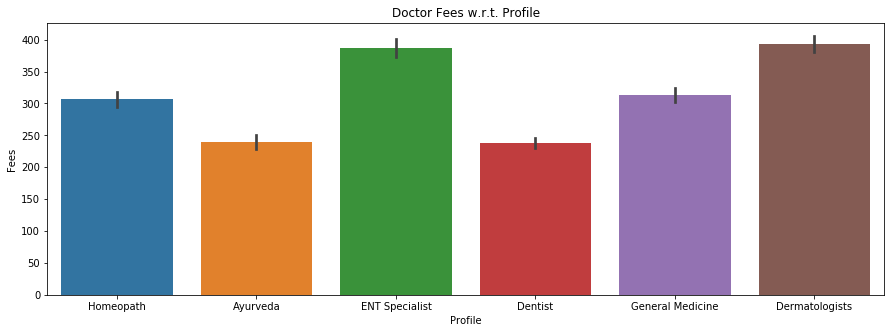

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='Profile',y='Fees',data=train)
plt.title("Doctor Fees w.r.t. Profile")
plt.show()

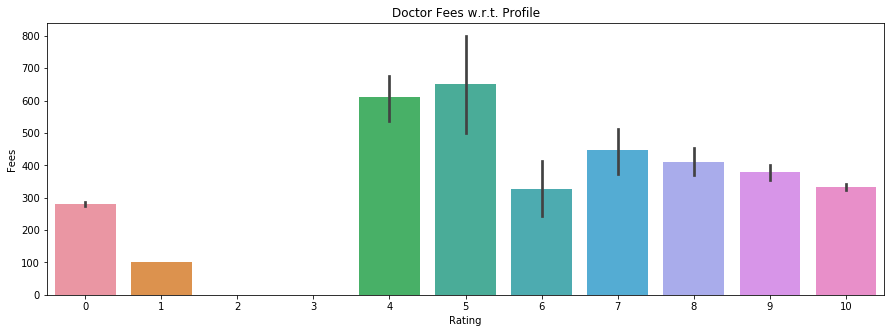

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x='Rating',y='Fees',data=train)
plt.title("Doctor Fees w.r.t. Profile")
plt.show()

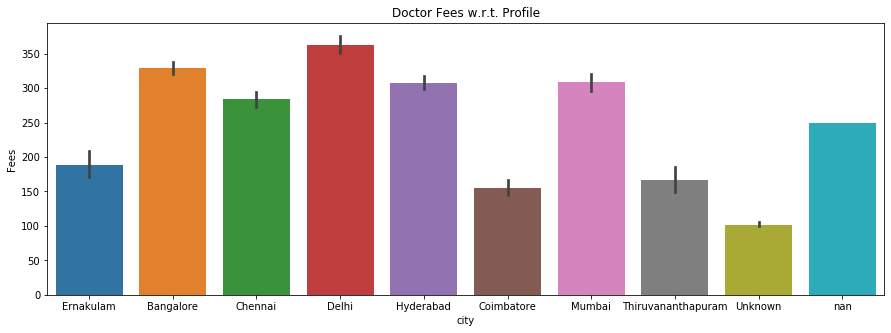

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x='city',y='Fees',data=train)
plt.title("Doctor Fees w.r.t. Profile")
plt.show()

In [23]:
# encode Profile and city
train = pd.get_dummies(train, columns=['city','Profile'], prefix=['city','Profile'])

In [24]:
#Drop the Useless features
train.drop(['Miscellaneous_Info','locality'], axis=1, inplace=True)

In [25]:
#change the name of some columns to use it in correct way.
train.rename(columns={'MD - Dermatology':'MD_Dermatology','MS - ENT':'MS_ENT','Venereology & Leprosy':'Venereology_Leprosy',
                      'MD - General Medicine':'MD_General_Medicine','Diploma in Otorhinolaryngology (DLO)':'Diploma_in_Otorhinolaryngology',
                      'MD - Homeopathy':'MD_Homeopathy','Profile_ENT Specialist':'Profile_ENT_Specialist',
                      'Profile_General Medicine':'Profile_General_Medicine'}, inplace=True)

In [26]:
x = train.drop('Fees',axis=1)    #Independent Variables
y = train['Fees']                #Dependent Variables(Target)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=43)

In [28]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [29]:
x_train

array([[-0.74308958, -0.88739613, -0.94343173, ..., -0.37068124,
        -0.49475106, -0.40691545],
       [ 1.66600817, -0.88739613, -0.94343173, ..., -0.37068124,
        -0.49475106, -0.40691545],
       [-0.5646379 , -0.88739613, -0.94343173, ..., -0.37068124,
        -0.49475106, -0.40691545],
       ...,
       [ 0.23839468,  1.17042744, -0.94343173, ..., -0.37068124,
        -0.49475106, -0.40691545],
       [-0.74308958,  1.17042744,  1.05996011, ..., -0.37068124,
        -0.49475106, -0.40691545],
       [ 0.14916884,  1.17042744,  1.05996011, ...,  2.69773568,
        -0.49475106, -0.40691545]])

In [30]:
x_test

array([[ 0.07024187, -0.9098137 , -0.94072087, ..., -0.37984526,
        -0.49559463, -0.40264132],
       [ 0.52718179, -0.9098137 ,  1.06301458, ...,  2.63265096,
        -0.49559463, -0.40264132],
       [-0.38669805,  1.1399479 ,  1.06301458, ..., -0.37984526,
        -0.49559463, -0.40264132],
       ...,
       [ 0.9841217 , -0.9098137 , -0.94072087, ..., -0.37984526,
        -0.49559463,  2.48360005],
       [-1.30057788, -0.9098137 , -0.94072087, ..., -0.37984526,
        -0.49559463, -0.40264132],
       [ 1.5324496 , -0.9098137 , -0.94072087, ..., -0.37984526,
        -0.49559463, -0.40264132]])

In [31]:
# to use RMSLE we will create our own scorer
from sklearn.metrics import make_scorer

# calculate RMSLE (SCORE func).
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred - y)**2)) / len(y))**1/2

# SCORING func for Cross Validation (RandomizedSearchCV)
scorer = make_scorer(score_func = score, greater_is_better=True)

# Model Building

In [32]:
# Support Vector Machine
svm = SVR(gamma='scale')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(svm, score(y_pred,y_test))

SVR() 0.802169518778292


In [33]:
# KNeighbors Regressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(knn, score(y_pred,y_test))

KNeighborsRegressor() 0.7741602154995761


In [34]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(dt, score(y_pred,y_test))

DecisionTreeRegressor() 0.6836271961375648


In [35]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(rf, score(y_pred,y_test))

RandomForestRegressor() 0.7661506062818965


# Hyper Parameter Tuning

In [43]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.004 total time=   1.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.004 total time=   1.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.002 total time=   1.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.009 total time=   1.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.001 total time=   1.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.012 total time=   1.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.012 total time=   1.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.010 total time=   1.2s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.006 total time=   1.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.009 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.015 total time=   1.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.001 total time=   4.2s
[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.067 total time=   5.8s
[CV 4/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.055 total time=   3.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.033 total time=   2.7s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.057 total time=   2.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.058 total time=   1.5s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.054 total time=   2.0s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.013 total time=   1.8s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.078 total time=   1.5s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.137 total time=   1.3s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.120 total time=   1.3s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.138 total time=   1.2s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [44]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVR(C=10, gamma=0.01)


In [52]:
# Support Vector Machine
svm = SVR(C=10, gamma=0.01)
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(svm, score(y_pred,y_test))

SVR(C=10, gamma=0.01) 0.8146558176934553


# Model Saving

In [ ]:
import joblib
joblib.dump(svm,"FinalModel.pkl")